# Clustering analysis 

## Mall customers dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans



In [73]:
# load the datasets
df = pd.read_csv(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\Clustering projects\Mall_Customers.csv", index_col = 'CustomerID')

### Some basic EDA

In [74]:
df.shape

(200, 4)

In [75]:
df.head() # customer ID is ranked by annual income

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [76]:
df.isna().sum() # no missing values 

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

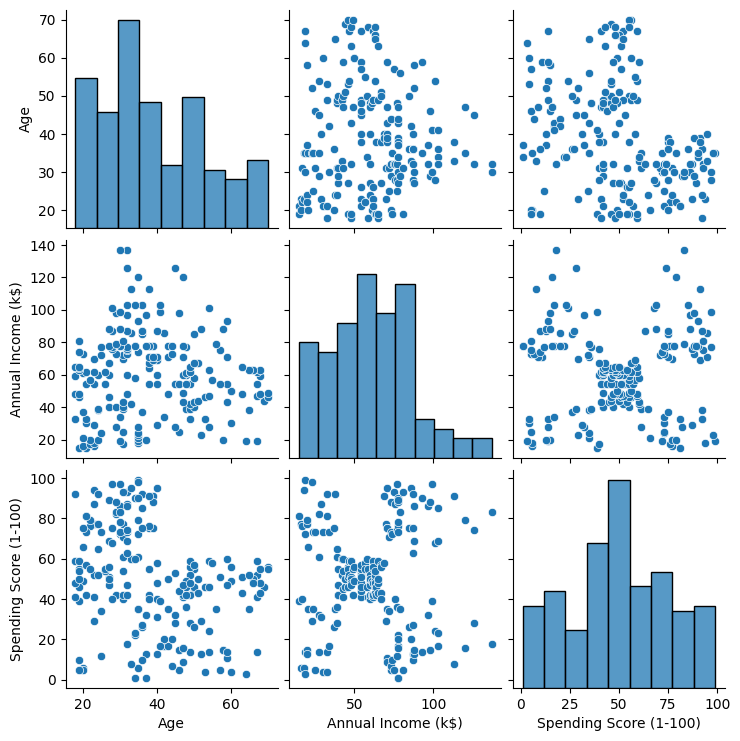

In [77]:
sns.pairplot(df)

In [78]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

For distance based methods like K Means, usually it's worth scaling the data. Can try on both scaled and unscaled data

In [79]:
# generate standard scaled data 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

How do I know how many clusters my data has? Can use the elbow method

This looks at the inertia graph tro determine when you get diminishing returns from adding additional clusters. 'Inertia' is the sum of sqaured distances from each point to the cluster it has been assigned tos centre. Will always decrease as you add more centres, but by less and less.

In [80]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

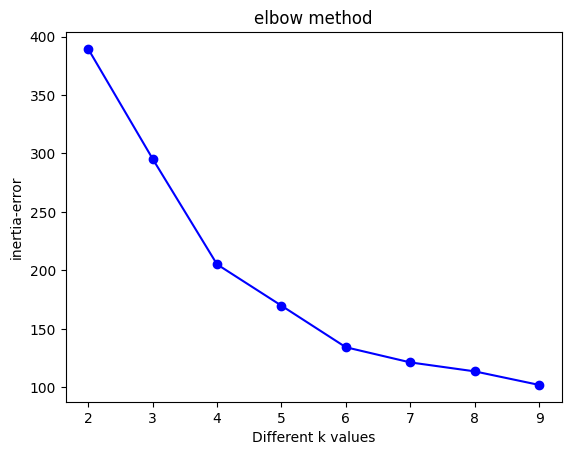

In [81]:
plt.plot(K, ssd, "bo-") #'bo-' specifies blue colour, and circles in the plot
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

Inertia decreases consdierably after 4 clusters, so I will use 4 clusters as my k value

In [82]:
from sklearn.metrics import silhouette_score

In [83]:
# apply K means clustering
K_means_model = KMeans(n_clusters = 4, random_state = 42)
clusters = K_means_model.fit_predict(X_scaled)

## silhouette score

I can also look a silhoutte score (and see how this changes with number of clusters)
Silhoutte score measures how similar a datapoint is to its own cluster (cohesion) vs the other clusters (separation). varies between -1 and 1, where +1: points are well clustered, 0: points are close to the boundaries of clusters, -1: points are poorly clustered (they are closer to points in other clusters)

In [84]:
from sklearn.metrics import silhouette_score

In [85]:
silhouette_score(X_scaled, K_means_model.labels_)

0.4039582785148566

In [86]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.276257743689132
For n_clusters=3, the silhouette score is 0.3070331565443169
For n_clusters=4, the silhouette score is 0.3825939315551745
For n_clusters=5, the silhouette score is 0.38827725876430913
For n_clusters=6, the silhouette score is 0.44013578685617516
For n_clusters=7, the silhouette score is 0.40934199435527335
For n_clusters=8, the silhouette score is 0.35102434320967335


The silhouette score by number of clusters also confirms 4 is the best number of clusters to use (or else, possibly 6??)

## visualisations of the clusters

My data is not labelled so I don't have any ground truth clusters I can compare my predicted clusters to. I can look at visualisations of the clusters on the other features though

In [87]:
# add the clusters back to the original df - (should I do this on the scaled features, instead??)
df1 = df.copy()
df1['Clusters'] = clusters

df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
4,Female,23,16,77,2
5,Female,31,17,40,2


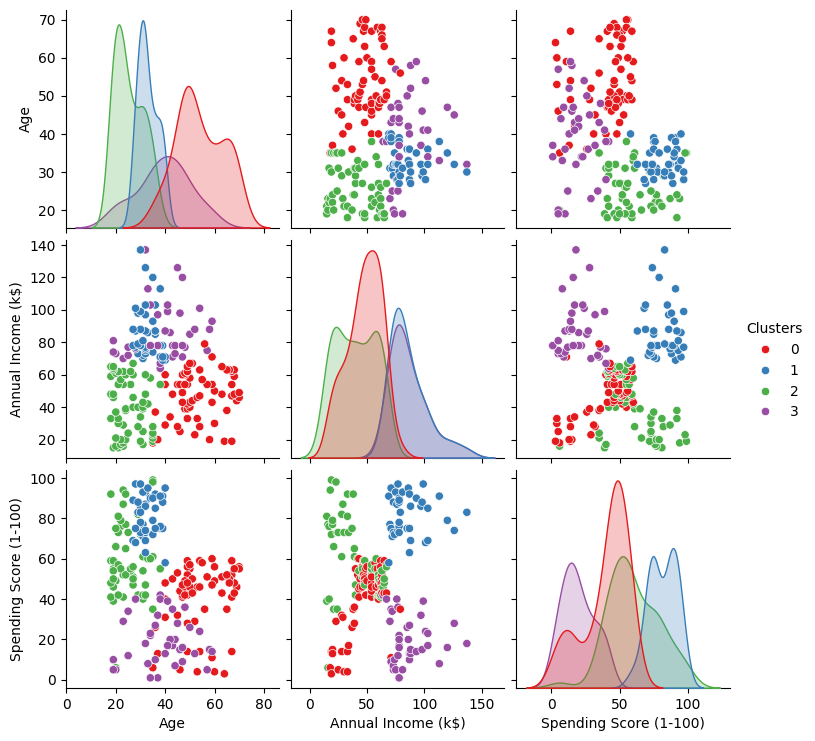

In [88]:
sns.pairplot(df1, hue = 'Clusters', palette='Set1', diag_kind='kde')

Red and green clusters are overlapping quite a lot in annual income and spend score. K Means assumes roughly equal sizings of the clusters which may not reflect reality. I can try other clustering algorithims to see if I can improve separation of clusters

## Agglomerative hieratchical clustering

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.2992593203550994
Silhouette Score for 3 clusters: 0.38141795042544546
Silhouette Score for 4 clusters: 0.41037986351850747
Silhouette Score for 5 clusters: 0.4401889024290193
Silhouette Score for 6 clusters: 0.44308912983504156
Silhouette Score for 7 clusters: 0.4262301125101286
Silhouette Score for 8 clusters: 0.41028404899198817
Silhouette Score for 9 clusters: 0.3663955117052502


In the hierarchical clustering, seems like 5 clusters is showing the best silhouette score

In [91]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters on scaled data: {silhouette_score(X_scaled, model.labels_)}')

Silhouette Score for 2 clusters on scaled data: 0.31795733680759597
Silhouette Score for 3 clusters on scaled data: 0.32148866683112387
Silhouette Score for 4 clusters on scaled data: 0.3614512741691407
Silhouette Score for 5 clusters on scaled data: 0.39002826186267214
Silhouette Score for 6 clusters on scaled data: 0.4201169558789579
Silhouette Score for 7 clusters on scaled data: 0.3982948069934959
Silhouette Score for 8 clusters on scaled data: 0.36647935858620495
Silhouette Score for 9 clusters on scaled data: 0.3753854624760522


FOr hierarchical clustering, performance on scaled data looks slightly worse according to silhouette score, so will use unscaled data instead

In [92]:
model1 = AgglomerativeClustering(n_clusters=5, linkage = "ward")
model1.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [93]:
df2 = df.copy()
df2['Clusters'] = model1.labels_
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,3
3,Female,20,16,6,4
4,Female,23,16,77,3
5,Female,31,17,40,4


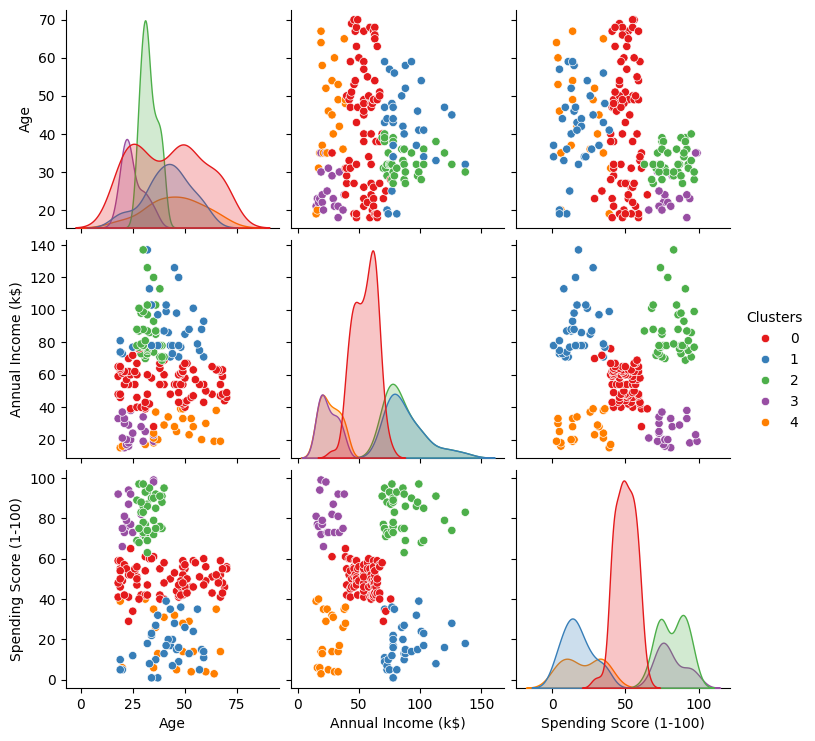

In [94]:
sns.pairplot(df2, hue = 'Clusters', palette='Set1', diag_kind='kde')

Plot shows much better separation especially in the Spending Score/Annual income plot